# Regression Open-Ended Project

-----

# Previous Notebooks

- Web Scraping
- Cleaning data
- Exploratory Data Analysis
- Feature Engineering

# More EDA

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ebert_imdb_df = pickle.load(open('../data/processed/ebert_imdb_final.pkl', 'rb'))
unique_genres = pickle.load(open('../data/interim/unique_genres.pkl', 'rb'))

In [4]:
genre_counts = pd.Series(index=unique_genres, dtype=int)

for genre in unique_genres:
    genre_counts[genre] = len(ebert_imdb_df[ebert_imdb_df[genre] == 1])
    
genre_counts.sort_values(ascending=False, inplace=True)

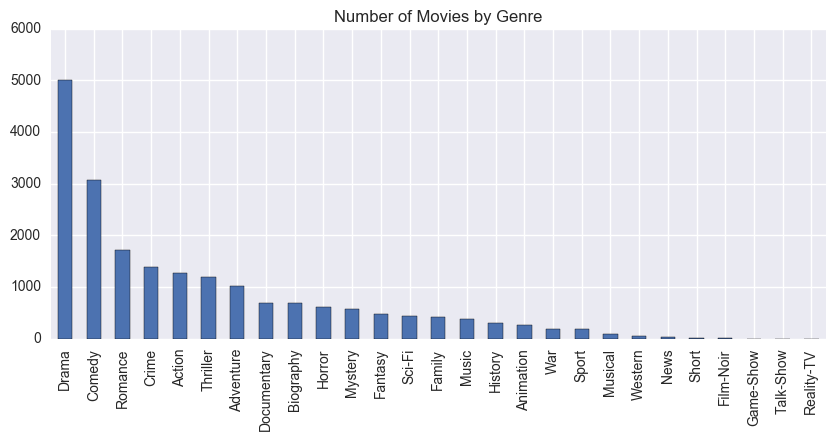

In [5]:
genre_counts.plot.bar(figsize=(10, 4), title="Number of Movies by Genre");

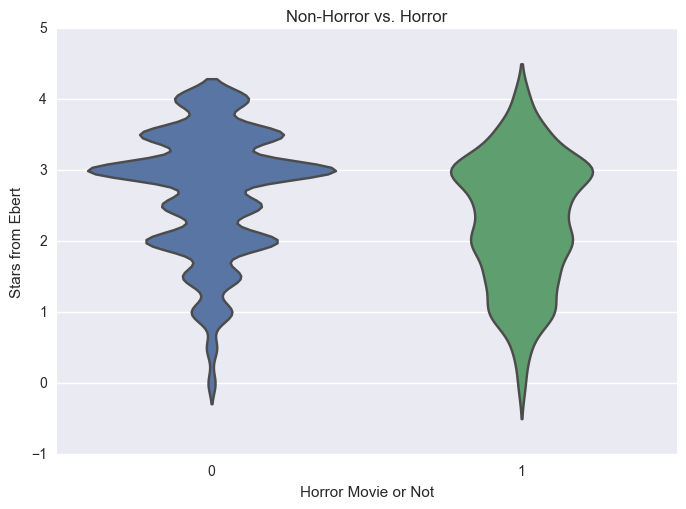

In [6]:
sns.violinplot(x="Horror", y="EbertStars", data=ebert_imdb_df, inner=None)
# sns.swarmplot(x="Horror", y="EbertStars", data=ebert_imdb_df, color="w", alpha=.5)
plt.xlabel('Horror Movie or Not')
plt.ylabel('Stars from Ebert')
plt.title('Non-Horror vs. Horror');

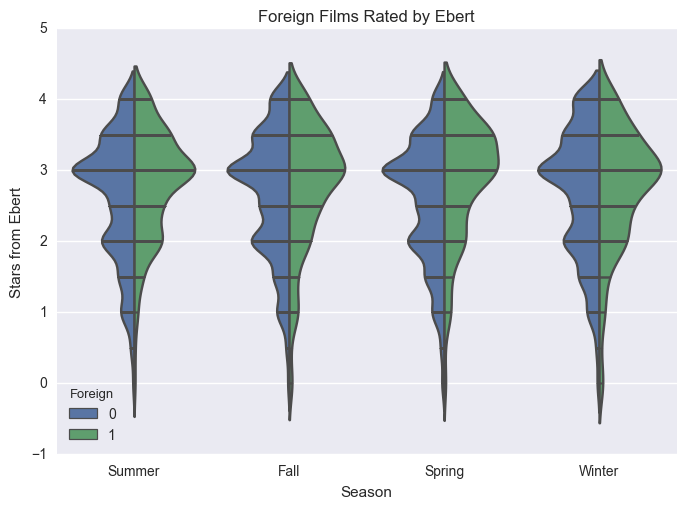

In [7]:
sns.violinplot(x="Season", y="EbertStars", hue="Foreign", split=True, inner="stick", 
               data=ebert_imdb_df)
plt.xlabel('Season')
plt.ylabel('Stars from Ebert')
plt.title('Foreign Films Rated by Ebert');

In [8]:
def more_visuals(rating=3.0):
    individual_rating = ebert_imdb_df[ebert_imdb_df['EbertStars'] == rating]
    
    # User to Critic Review Ratio
    ax = plt.axes()
    ax = sns.distplot((individual_rating['UC_Ratio'].dropna()), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='User to Critic Review Ratio for {}'.format(rating))
    ax.set_title("Normal Scale of User to Critic Review Ratio")
    plt.show()
    
    ax = plt.axes()
    ax = sns.distplot(np.log(individual_rating['UC_Ratio'].dropna()), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='User to Critic Review Ratio for {}'.format(rating))
    ax.set_title("Log Transformation of User to Critic Review Ratio")
    plt.show()
    
    # Description Length
    ax = plt.axes()
    ax = sns.distplot((individual_rating['Description_Len'].dropna()), bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Description Length for {}'.format(rating))
    ax.set_title("Description Length")
    plt.show()

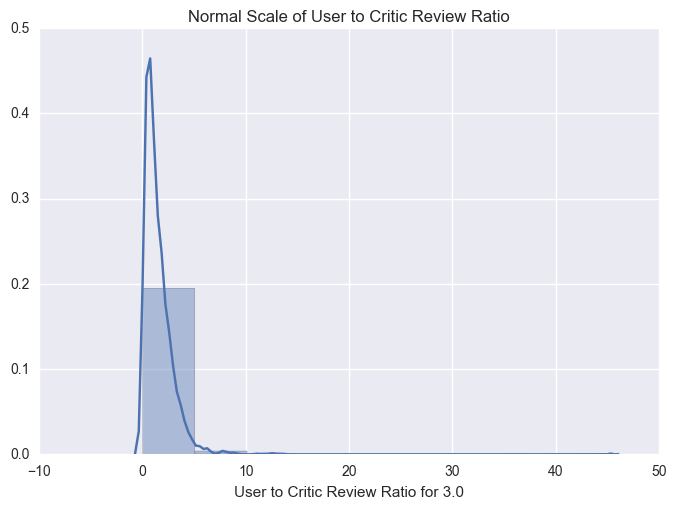

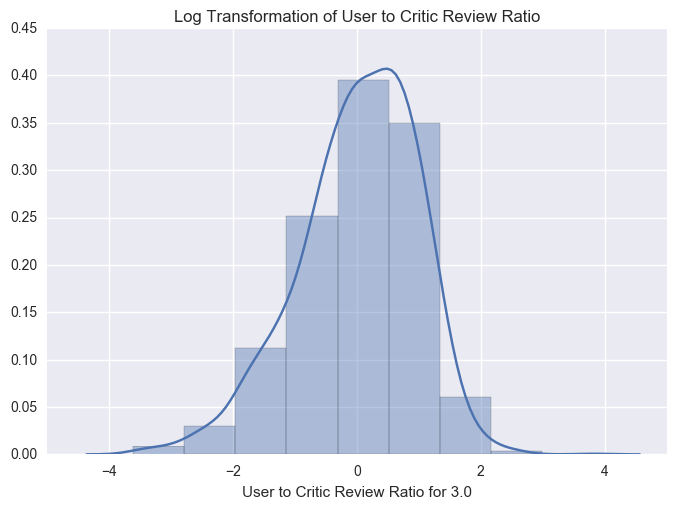

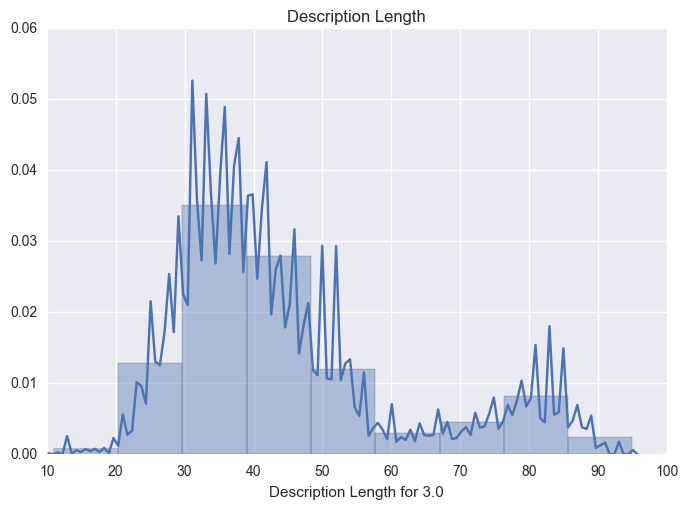

In [9]:
more_visuals()

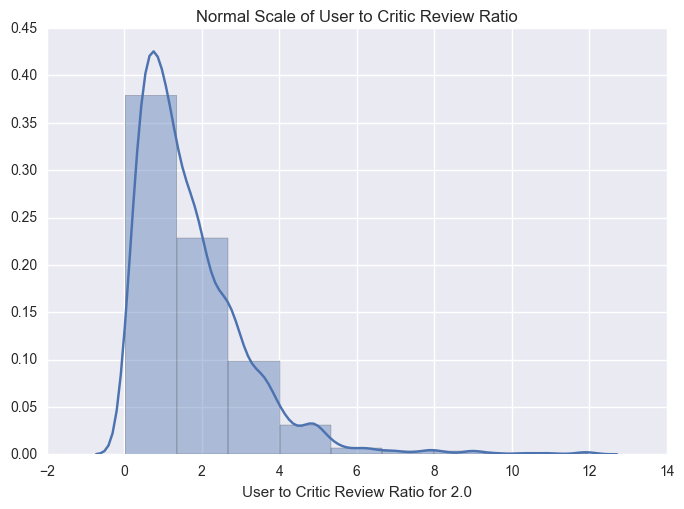

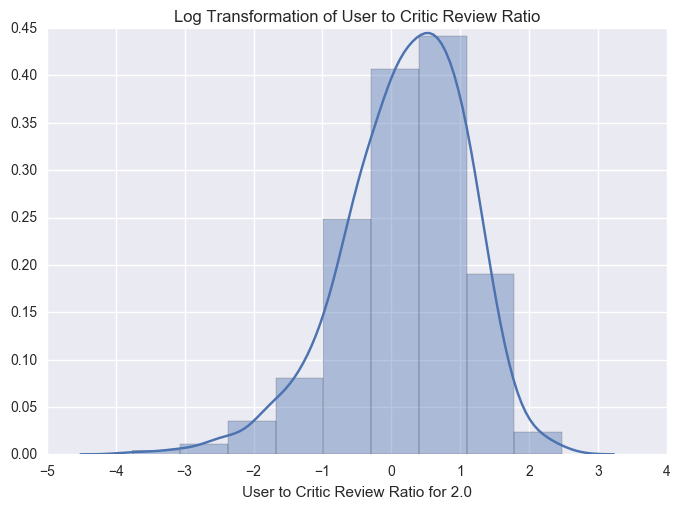

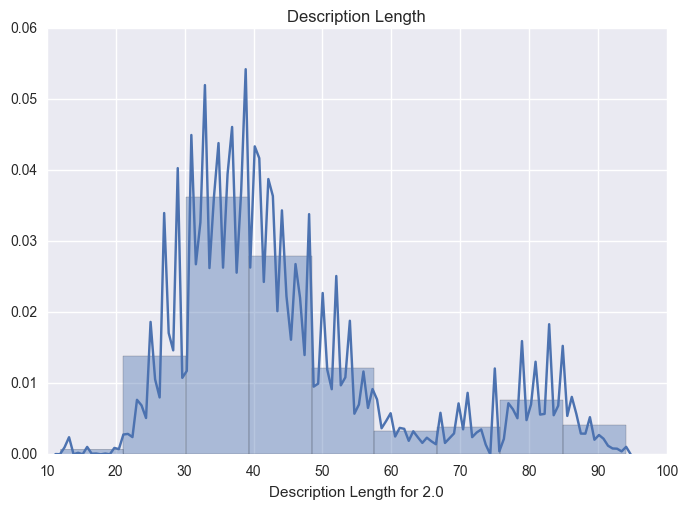

In [10]:
more_visuals(rating=2.0)

# Plan for Following Notebooks

- Making predictions
- Final analysis